# Homework 5

#### Berk Gorgulu, 2016702123

## Part I

### 1-2)  Directed Graphical Model and Factor Graph with the expression for the full joint distribution and assign terms to the individual factors on the Factor Graph

### Directed Graphical Model 

<img src="Selection_004.png">

### Factor Graph 

<img src="Selection_006.png">

### Full Joint Distribution 

<img src="Selection_010.png">

### 3) Full Conditional Distributions 

### $p(A|R,x_0,x_1)$

<img src="Selection_017.png">

### $p(R|A,x_0,x_1)$

<img src="Selection_018.png">

### 4) Derive the joint distribution and draw a contour plot

### Joint Distribution

<img src="Selection_011.png">

### Contour Plot

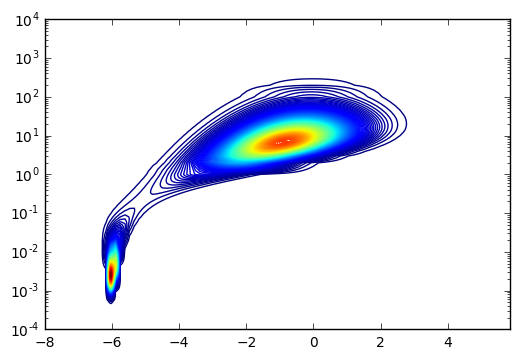

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import misc
from scipy.special import gammaln as gammaln
from scipy.special import gamma as gamma
import plotly.plotly as py
import plotly.graph_objs as go
from scipy import optimize
nu = 0.4
beta = 100
P = 1.2
x_0 = 1
x_1 = -6


A = np.linspace(-8,6,100,endpoint=False).tolist()
R = np.linspace(0.0001,0.01,100,endpoint=False).tolist()
R2 =np.linspace(0.01,1,100,endpoint=False).tolist()
R3 = np.linspace(1,100,100,endpoint=False).tolist()
R4 = np.linspace(100,10000,100,endpoint=False).tolist()
R = R + R2 + R3 + R4

v=[]
for r in R:
    v2 = []
    for a in A:
        n1 = -0.5*x_1*x_1/r+x_0*x_1*a/r-0.5*x_0*x_0*a*a/r-0.5*np.log(2*np.pi*r)
        n2 = -0.5*a*a/P
        n3 = -(nu+1)*np.log(r)-nu/(beta*r)
        v2.append(np.exp(n1+n2+n3))
    v.append(v2)
    
v = np.array(v)
CS = plt.contour(A,R,v,200)
plt.yscale('log')
plt.show()

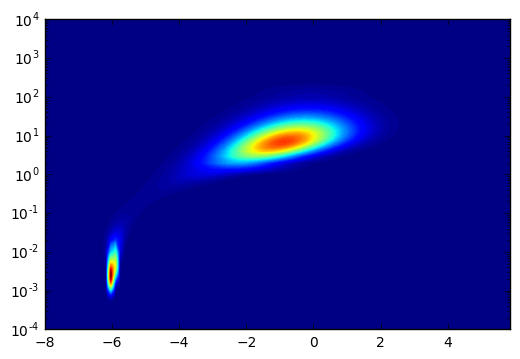

In [2]:
CS = plt.contourf(A,R,v,100)
plt.yscale('log')
plt.show()

## Part II

### 1) Derive and implement an EM algorithm to find the MAP estimate

### Derivation

<img src='Selection_016.png'>

### Implementation

From the contour plot we can see that there are two local optima therefore depending on the starting point of the algorithm it converges to one of the two optima. Both of the cases are demonstrated below.

In [17]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import misc
from scipy.special import gammaln as gammaln
from scipy.special import gamma as gamma

nu = 0.4
beta = 100
P = 1.2
x_0 = 1
x_1 = -6

def EM_R(nu,beta,P,x_0,x_1,R_0):
    R = R_0
    Rold = 1000000000
    counter = 0
    while(True):
        E = (R*P)/(P*x_0*x_0+R)
        m = E*x_0*x_1/R
        R = ((nu/beta)+0.5*x_1*x_1-x_0*x_1*m+0.5*x_0*x_0*(m*m+E))/(nu+1.5)
        if np.abs(Rold-R)<0.000000000001:
            break
        Rold = R
        counter = counter+1
    print 'Converged in',counter,'iterations'
    print 'R:', R

print "Case1: R_0 = 0.01"
EM_R(nu,beta,P,x_0,x_1,0.01)
print "Case2: R_0 = 1"
EM_R(nu,beta,P,x_0,x_1,1)

Case1: R_0 = 0.01
Converged in 19 iterations
R: 0.00293091809623
Case2: R_0 = 1
Converged in 25 iterations
R: 7.24589908034


### 2) Derive and implement an EM algorithm to find the MAP estimate

### Derivation

<img src="Selection_015.png">

### Implementation

From the contour plot we can see that there are two local optima therefore depending on the starting point of the algorithm it converges to one of the two optima. Both of the cases are demonstrated below.

In [31]:
def EM_A(nu,beta,P,x_0,x_1,A_0):
    A = A_0
    Aold=100000000000
    counter = 0
    while(True):
        a = nu +0.5
        b = (nu/beta)+0.5*x_1*x_1-x_0*x_1*A+0.5*x_0*x_0*A*A
        A = (x_0*x_1*a/b)/((1/P)+x_0*x_0*a/b)
        if np.abs(Aold-A)<0.00001:
            break
        Aold = A
        counter = counter+1
    print 'Converged in', counter,'iterations'
    print 'A:', A
print "Case1: A_0 = 0.002575"
EM_A(nu,beta,P,x_0,x_1,0.002575)
print "Case2: A_0 = -6.2"
EM_A(nu,beta,P,x_0,x_1,-6.2)

Case1: A_0 = 0.002575
Converged in 6 iterations
A: -0.384555699187
Case2: A_0 = -6.2
Converged in 7 iterations
A: -5.97631257653


### 3) Derive and implement an ICM (Iterative conditional modes) algorithm to find

### Derivation

<img src="Selection_014.png">

### Implementation

From the contour plot we can see that there are two local optima therefore depending on the starting point of the algorithm it converges to one of the two optima. Both of the cases are demonstrated below.

In [33]:
def ICM(nu,beta,P,x_0,x_1,A_0,R_0):
    A = A_0
    R = R_0
    Aold=100000000000
    Rold=100000000000
    iteration=0
    while(True):
        A = (x_0*x_1/R)/((1/P)+(x_0*x_0/R))
        R = ((nu/beta)+0.5*x_1*x_1-x_0*x_1*A+0.5*x_0*x_0*(A*A))/(nu+1.5)
        if np.abs(Aold-A)<0.001 and np.abs(Rold-R)<0.001:
            break
        Rold = R
        Aold = A
        iteration=iteration+1
    print 'Converged in',iteration,'iterations'
    print 'R:', R
    print 'A:', A
print "Case1: R_0 = 1, A_0 = 3"        
ICM(nu,beta,P,x_0,x_1,3,1)   
print "Case2: R_0 = 1, A_0 = 3"        
ICM(nu,beta,P,x_0,x_1,-6,0.0001)   

Case1: R_0 = 1, A_0 = 3
Converged in 9 iterations
R: 6.86647990633
A: -0.892689196452
Case2: R_0 = 1, A_0 = 3
Converged in 2 iterations
R: 0.0021351261053
A: -5.98934733835


### 4) Extending VB algorithm

<img src="Selection_019.png">

Mu: -0.370434757455
Sig: 1.12591304851
a: 0.9
b: 16.4129589343
Lowerbound: -0.0872442906166


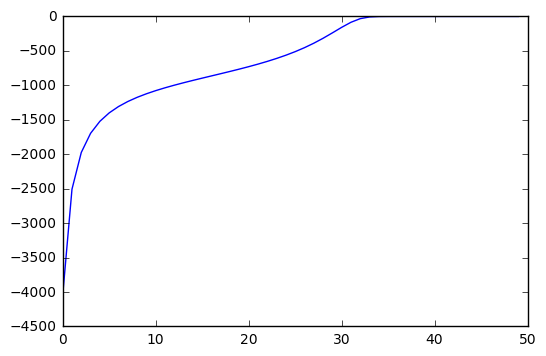

In [34]:
nu = 0.4
beta = 100
nu_beta = nu/beta
P=1.2
x_0=1
x_1=-6
T=50
E_A = -6
E_A2=E_A*E_A
E_invR = float(1/0.0000001)
lowerbound = []
for t in range(T):
    Sig = 1/(1/P + x_0*x_0*E_invR)
    mu = Sig*x_0*x_1*E_invR
    
    E_A = mu
    E_A2 = mu*mu + Sig
    
    a = nu + 0.5
    b = 0.5*(x_1*x_1 -2*x_1*x_0*E_A + x_0*x_0*E_A2) + nu_beta
    
    E_invR = a/b
    q_AR = -0.5*x_1*x_1*E_invR + x_0*x_1*E_A*E_invR - 0.5*x_0*x_0*E_A2*E_invR - 0.5*np.log(1/E_invR) - 0.5*E_A2/P  - (nu+1)*np.log(1/E_invR) - nu*E_invR/beta 
    #- 0.5*np.log(np.abs(2*np.pi*P))- gammaln(nu) + nu*np.log(nu/beta)  
    q_A = -0.5*(1/P + x_0*x_0*E_invR)*E_A2 + x_0*x_1*E_invR*E_A
    q_R = -1*(nu+1.5)*np.log(1/E_invR)-(nu/beta + 0.5*x_1*x_1 - x_0*x_1*E_A + 0.5*x_0*x_0*E_A2)*E_invR
    lowerbound.append(q_AR-(q_A+q_R))
    
plt.plot(lowerbound)    
print 'Mu:',mu
print 'Sig:',Sig
print 'a:',a
print 'b:',b
print 'Lowerbound:',lowerbound[len(lowerbound)-1]
